## [75.06 / 95.58] Organización de Datos
## Trabajo Práctico 1: Análisis Exploratorio de Datos
### Grupo 18: DATAVID-20

* 102732 - Bilbao, Manuel
* 101933 - Karagoz, Filyan
* 98684 - Markarian, Darío
* 100901 - Stroia, Lautaro

## 1. Importación general de librerias y set-up de datos.

In [1]:
import pandas as pd
pd.options.display.max_rows = None
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re as re

%matplotlib inline
plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (20, 10)
sns.set(style="whitegrid") # seteando tipo de grid en seaborn
pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

dataframe = pd.read_csv('train.csv')
dataframe.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## 2. Información general del set de datos


In [2]:
#Cantidad de filas y columnas. Uso de memoria.
print("Filas y columnas del set de datos: {}.".format(dataframe.shape))
print("Uso de memoria del set de datos : {:.2f} MB.".format(dataframe.memory_usage().sum() / 1024**2))

Filas y columnas del set de datos: (7613, 5).
Uso de memoria del set de datos : 0.29 MB.


In [3]:
#Tipos de datos presentes en el dataframe
dataframe.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [4]:
#Cantidad de valores nulos/NaN en las columnas del dataframe
pd.DataFrame(pd.isna(dataframe).sum(), columns = ['NaN amount'])

,NaN amount
id,0
keyword,61
location,2533
text,0
target,0


In [5]:
#Cantidad de valores no repetidos en las columnas del dataframe
pd.DataFrame(dataframe.nunique(), columns = ['Non Repeated amount'])

,Non Repeated amount
id,7613
keyword,221
location,3341
text,7503
target,2


### 2.1. Limpieza de datos erróneos

In [6]:
#Voy a eliminar los caracteres raros de cada keyword mediante regular expressions.
dataframe['keyword'] = dataframe['keyword'].apply(lambda x: re.sub(r'%20',' ', str(x)))

## 3. Análisis de los tweets

In [7]:
#Empezamos agregando al dataframe, una columna que indique la longitud de cada tweet.
dataframe['tweet lenght'] = dataframe['text'].str.len()
dataframe.head()

,id,keyword,location,text,target,tweet lenght
0,1,nan,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,nan,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,nan,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,nan,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,nan,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


In [8]:
#Tweet mas largo y mas corto
largest_tweet = dataframe['tweet lenght'].max()
shortest_tweet = dataframe['tweet lenght'].min()
[largest_tweet, shortest_tweet]

[157, 7]

In [9]:
#Buscamos en qué rango de longitudes entra cada tweet, para luego poder hacer una visualizacion del tipo
# cantidad de tweets vs longitud de tweets, y no tener que poner cada longitud distinta.
df_len_interval = pd.cut(dataframe['tweet lenght'],[i for i in range(0, largest_tweet, 10)])
df_len_interval.to_frame().head()

,tweet lenght
0,"(60, 70]"
1,"(30, 40]"
2,"(130, 140]"
3,"(60, 70]"
4,"(80, 90]"


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text major ticklabel objects>)

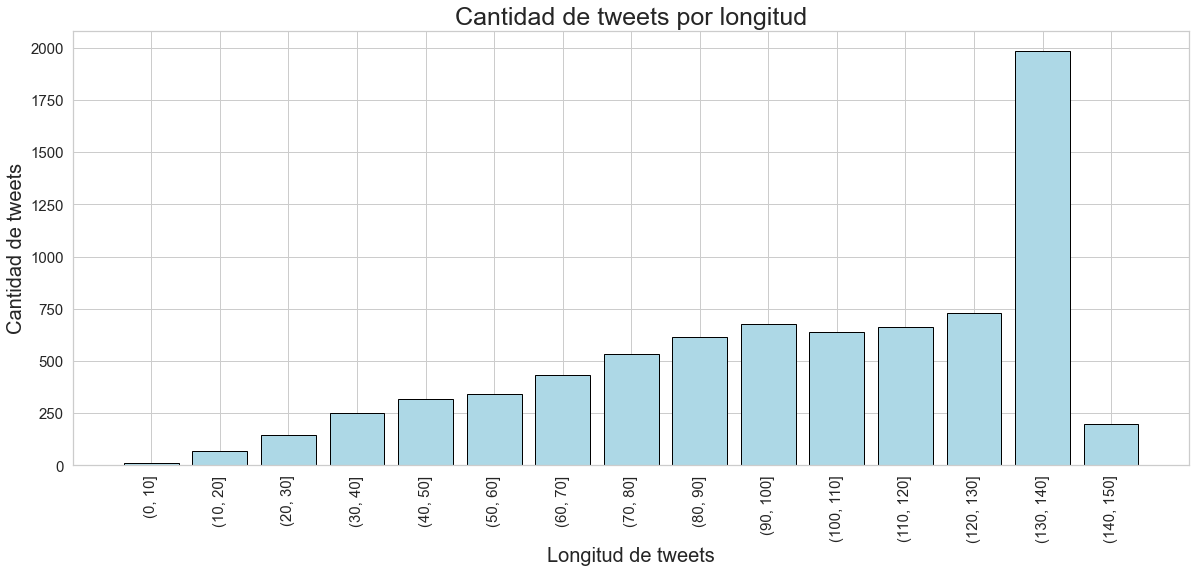

In [10]:
#cantidad de tweets por longitud
df_lenght = dataframe.groupby(df_len_interval).size()
fig = plt.figure(figsize = (20, 8))
plt.bar(df_lenght.index.astype(str), df_lenght.values, color = 'lightblue',edgecolor = 'black')
plt.xlabel("Longitud de tweets", fontsize=20)
plt.ylabel("Cantidad de tweets",fontsize=20)
plt.title("Cantidad de tweets por longitud", fontsize=25)
plt.tick_params(axis='both', labelsize = 15)
plt.xticks(rotation = 90)

Vemos que la mayoria de los tweets tienen una longitud de entre 130 y 140 caracteres.

### 3.1. Análisis de longitud y target
Sabemos que, según el target, los tweets pueden ser **verdaderos** (target = 1) o **falsos** (target = 0). Vamos a analizar ambos tipos de tweets.

In [11]:
#Nos quedamos con los tweets verdaderos
df_real_tweets = dataframe[dataframe['target'] == 1]
df_real_tweets.head()

,id,keyword,location,text,target,tweet lenght
0,1,nan,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,nan,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,nan,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,nan,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,nan,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


In [12]:
#cantidad de tweets reales
len(df_real_tweets)

3271

In [13]:
#Nos quedammos con los tweets falsos
df_fake_tweets = dataframe[dataframe['target'] == 0]
df_fake_tweets.head()

,id,keyword,location,text,target,tweet lenght
15,23,nan,NaN,What's up man?,0,14
16,24,nan,NaN,I love fruits,0,13
17,25,nan,NaN,Summer is lovely,0,16
18,26,nan,NaN,My car is so fast,0,17
19,28,nan,NaN,What a goooooooaaaaaal!!!!!!,0,28


In [14]:
#cantidad de tweets falsos
len(df_fake_tweets)

4342

In [15]:
#Analisis estadistico de los tweets en funcion de su longitud
df_statistics = dataframe.groupby('target').agg({'tweet lenght':['min','max','mean']})
level0 = df_statistics.columns.get_level_values(0)
level1 = df_statistics.columns.get_level_values(1)
df_statistics_one_dimension = df_statistics.copy()
df_statistics_one_dimension.columns = level0 + ' ' + level1
df_statistics_one_dimension

,tweet lenght min,tweet lenght max,tweet lenght mean
target,,,
0,7,157,95.71
1,14,151,108.11


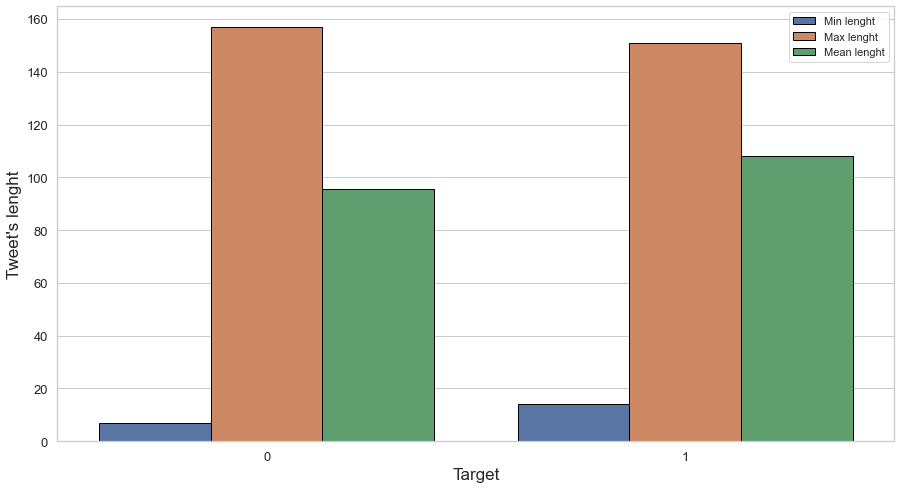

In [16]:
#Hago un stack() para modificar la estructura del dataframe de 2 dimensiones asi puedo manejar
#todas las columnas para realizar una visualizacion
df_statistics_stacked = df_statistics.stack()

plt.figure(figsize = (15,8))
graphic = sns.barplot(x = 'target', y = 'tweet lenght', hue = 'level_1', data = df_statistics_stacked.reset_index(), edgecolor = 'black')
plt.xlabel("Target", fontsize = 17)
plt.ylabel("Tweet's lenght", fontsize = 17)
legend = graphic.legend()
legend.set_title("")
for t, l in zip(legend.texts,("Min lenght", "Max lenght","Mean lenght")):
    t.set_text(l)
plt.tick_params(axis='both', labelsize = 13)

### 3.2. Análisis de keywords


In [17]:
#Top-10 de keywords mas usadas en tweets reales
real_tweets_keywords = df_real_tweets['keyword'].value_counts().to_frame().drop('nan',axis=0)
real_tweets_keywords.columns = ['keyword appearances']
real_tweets_keywords.head(10)


,keyword appearances
outbreak,39
derailment,39
wreckage,39
oil spill,37
typhoon,37
debris,37
suicide bomb,32
rescuers,32
evacuated,32
suicide bombing,32


In [18]:
#Top-10 de keywords mas usadas en tweets falsos
fake_tweets_keywords = df_fake_tweets['keyword'].value_counts().to_frame().drop('nan',axis=0)
fake_tweets_keywords.columns = ['keyword appearances']
fake_tweets_keywords.head(10)


,keyword appearances
body bags,40
armageddon,37
harm,37
deluge,36
ruin,36
wrecked,36
fear,35
siren,35
explode,35
twister,35


In [43]:
#Podríamos ver de las palabras más repetidas en las falsas que tanto se repiten en las verdaderas 
#y viceversa, a ver si hay palabras que solo (o casi) aparecen en una de las dos.
merged = fake_tweets_keywords.reset_index().merge(real_tweets_keywords.reset_index(),on = 'index',suffixes=(' fakes', ' reals'))
merged = merged.rename(columns = {'index':'keyword'}).set_index('keyword')
merged['diff'] = merged['keyword appearances reals'] - merged['keyword appearances fakes']
merged = merged.sort_values(by = ["diff"], ascending = [False])

In [44]:
# Aparecen principalmente en reales
merged.head()

,keyword appearances fakes,keyword appearances reals,diff
keyword,,,
outbreak,1,39,38
oil spill,1,37,36
typhoon,1,37,36
suicide bombing,1,32,31
suicide bomber,1,30,29


In [45]:
# Aparecen principalmente en falsos
merged.tail()

,keyword appearances fakes,keyword appearances reals,diff
keyword,,,
blazing,33,1,-32
wrecked,36,3,-33
harm,37,4,-33
ruin,36,1,-35
body bags,40,1,-39


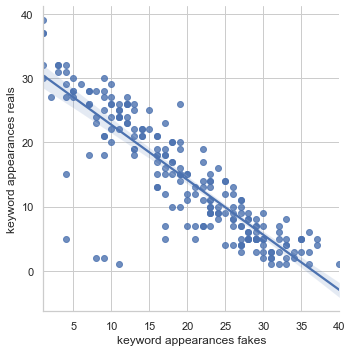

In [67]:
sns.lmplot(x = "keyword appearances fakes", y = "keyword appearances reals", data = merged, fit_reg = True)